
# <span style="color:rgb(213,80,0)">Windsor House Price data.</span>

This file creates Figures 8.1\-8.7 and Table 8.1

## Beginning of code

In [1]:
prin=0;

load hprice.txt;

% setup parameters

y=hprice(:,1);
X=hprice(:,2:5);

n=size(hprice,1);
p=size(X,2)+1;

bayes=struct;
n0=6;
bayes.n0=n0;

% beta prior setting
beta0=zeros(5,1);
beta0(2,1)=10;
beta0(3,1)=5000;
beta0(4,1)=10000;
beta0(5,1)=10000;
bayes.beta0=beta0;

% tau0 prior setting
s02=1/4.0e-8;
tau0=1/s02;
bayes.tau0=tau0;

% R prior settings
R=2.4*eye(5);
R(2,2)=6e-7;
R(3,3)=.15;
R(4,4)=.6;
R(5,5)=.6;
diagR=diag(R);
R=inv(R);
bayes.R=R;

## Create initial yXplot

Not given in the book yXplot(y,X)

## Create Table 8.1

Windsor House Price data: prior and least squares estimates of parameters


In [2]:
betaLS=regstats(y,X,"linear",{'beta', 'mse'});
betaOLS=betaLS.beta;
tauOLS=1/(betaLS.mse*(n-p)/n);

T1=[[beta0; tau0], [diagR; n0],  [betaOLS; tauOLS]];
nam=["beta"+(0:4) "tau"];
T1table=array2table(T1,'RowNames',nam,'VariableNames',["mean" "V0jj" "Least squares"]);
disp('Table 8.1')

Table 8.1

In [3]:
disp(T1table)

             mean     V0jj     Least squares
             _____    _____    _____________
    beta0        0      2.4        -4009.5  
    beta1       10    6e-07         5.4292  
    beta2     5000     0.15         2824.6  
    beta3    10000      0.6          17105  
    beta4    10000      0.6         7634.9  
    tau      4e-08        6     3.0251e-09

## Create Figure 8.1

In [4]:
outFSRB=FSRB(y,X,'bayes',bayes', 'plots',1,'xlim',[280 n]);

Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=502 because
rmin(502,546)>99.99% and rmin(501,546)>99.99% and rmin(503,546)>99.99%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=501
Superimposition stopped because r_{min}(512,529)>99.9% envelope
Subsample of 528 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=18
Summary of the exceedances
           1          99         999        9999       99999
          10          64          48          39          29


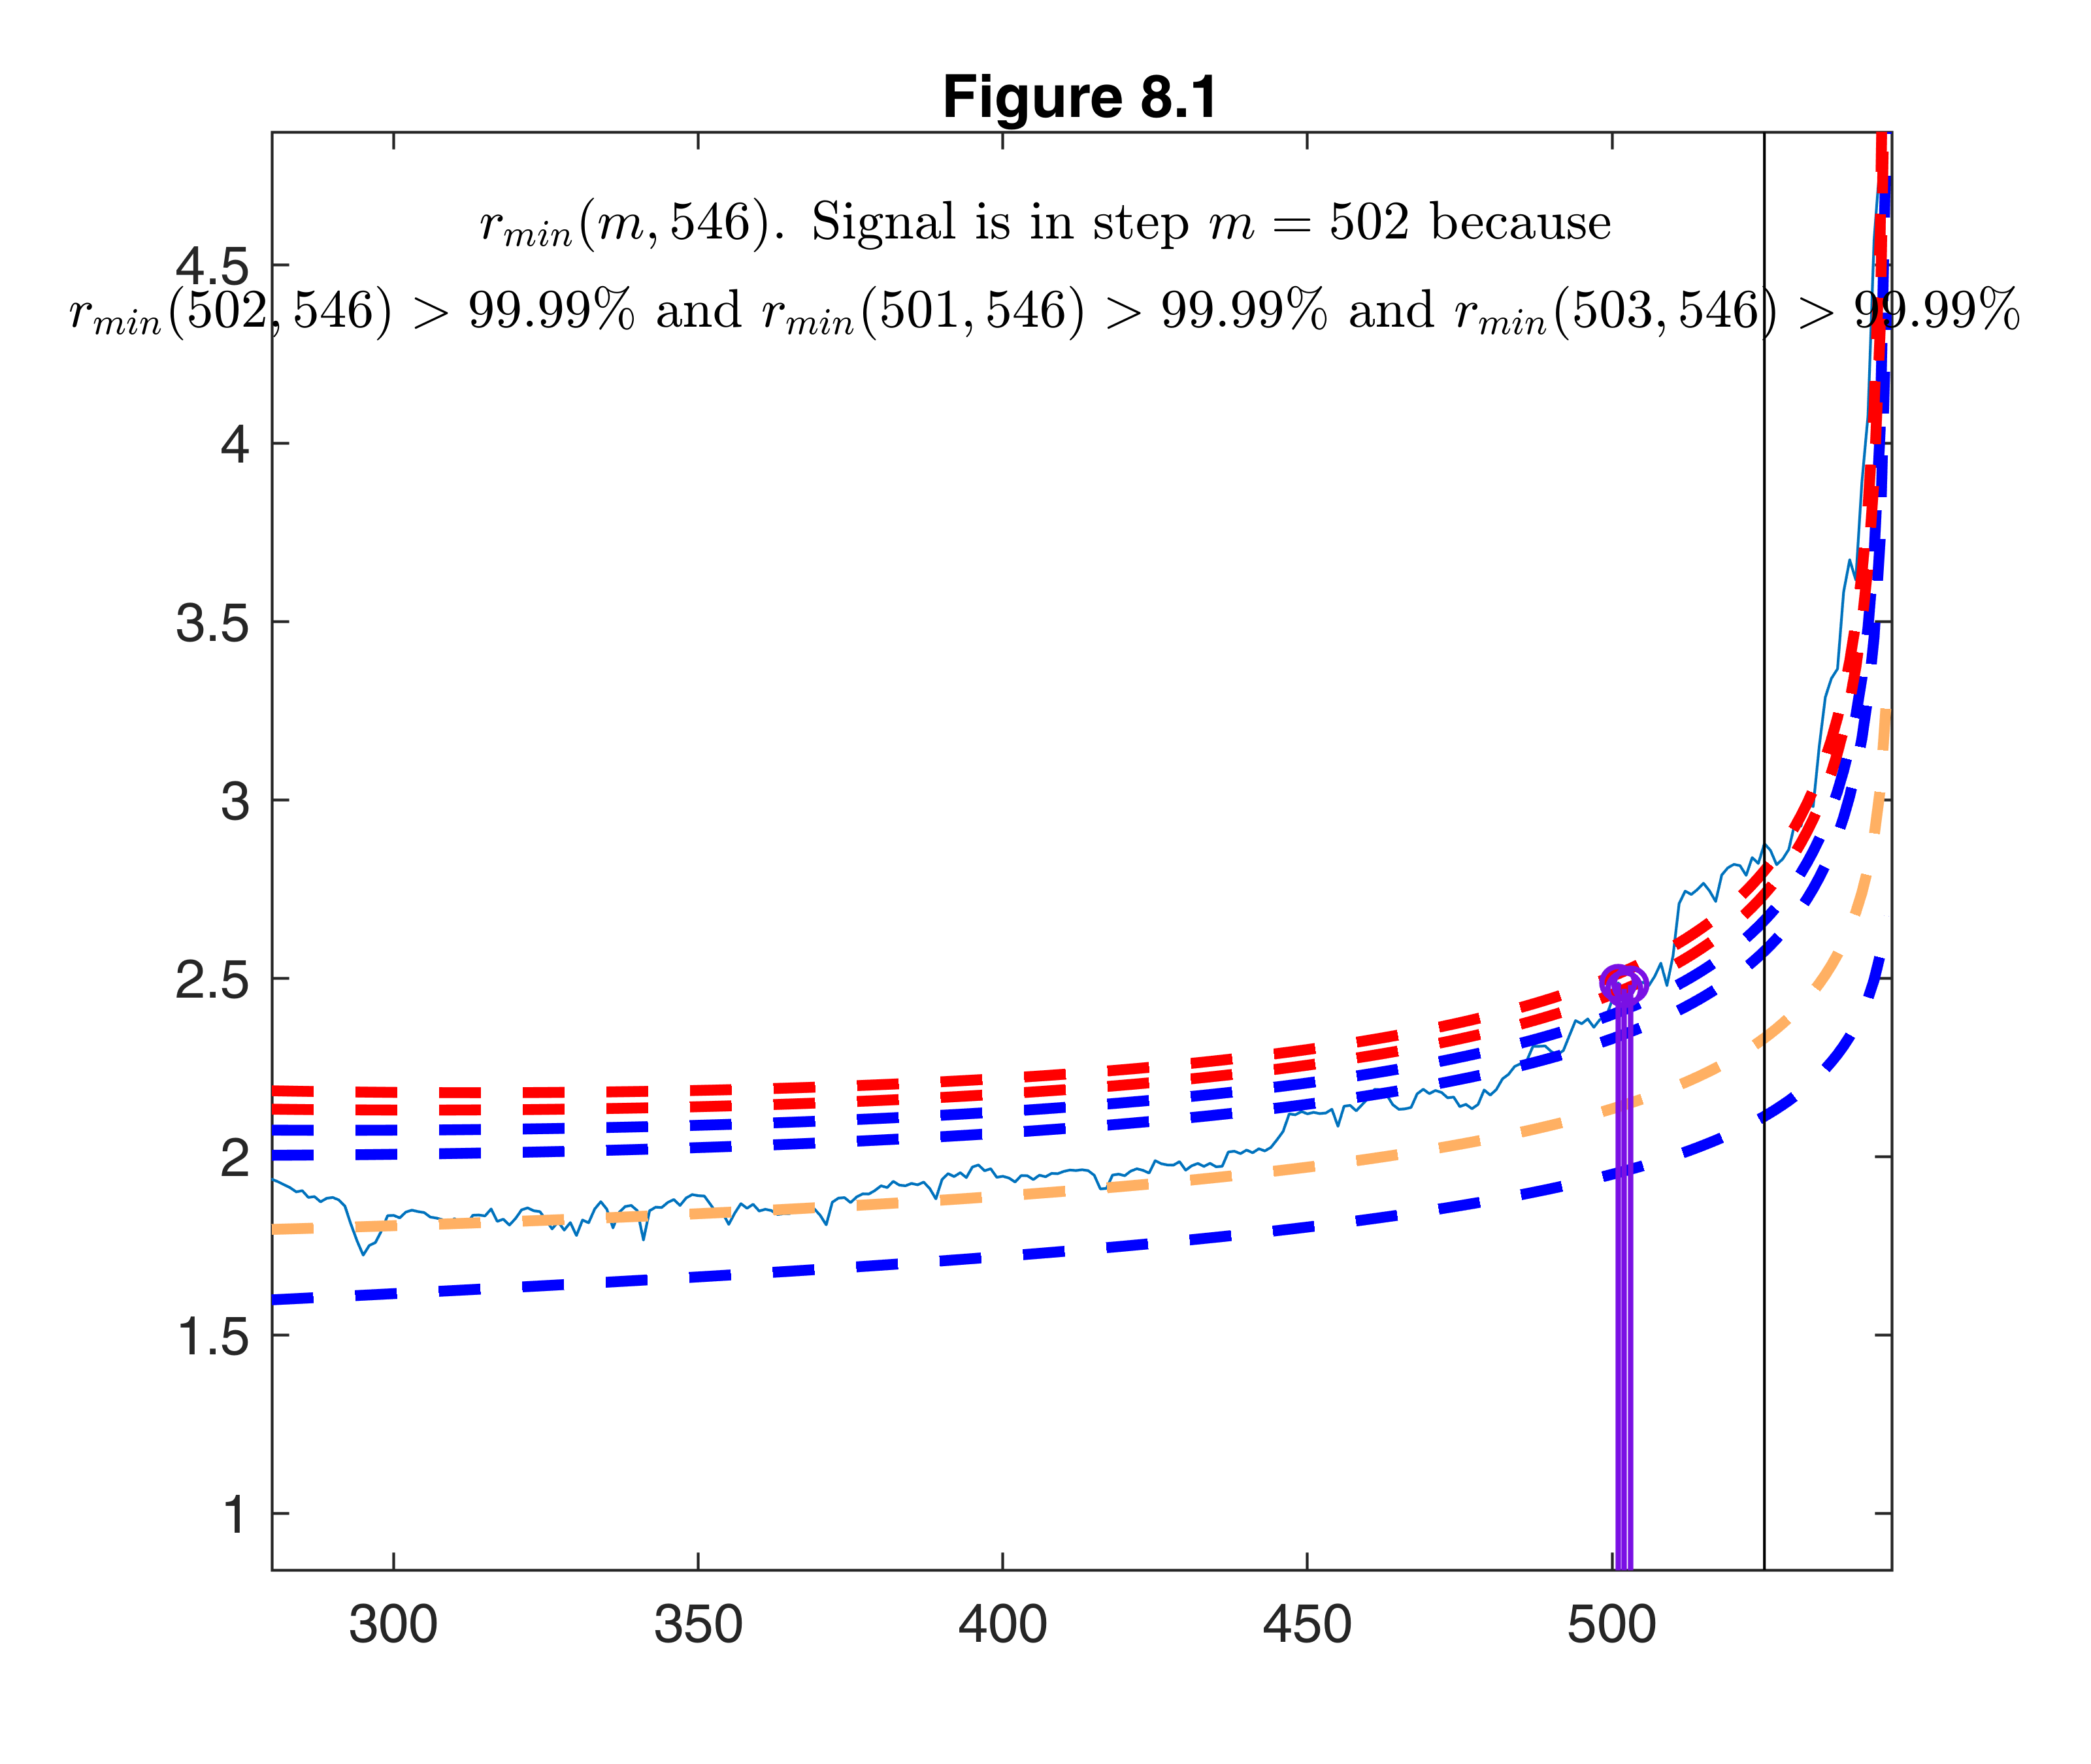

In [5]:
dout=n-length(outFSRB.ListOut);

fig=findobj(0,'tag','fsr_yXplot');
delete(fig(1))

fig=findobj(0,'tag','pl_fsr');
figure(fig(1))
if prin ==1
    print -depsc h1.eps;
else
    set(gcf,'Name', 'Figure 8.1');
    title('Figure 8.1')
end

## Create Figure 8.2

init = initial point to start monitoring


In [6]:
init=20;
xlimL=init; % lower value of xlim
xlimU=125;  % upper value of xlim

outBAeda=FSRBeda(y,X,'bayes',bayes,'init',init, 'conflev', [0.95 0.99]);

m=100
m=200
m=300
m=400
m=500


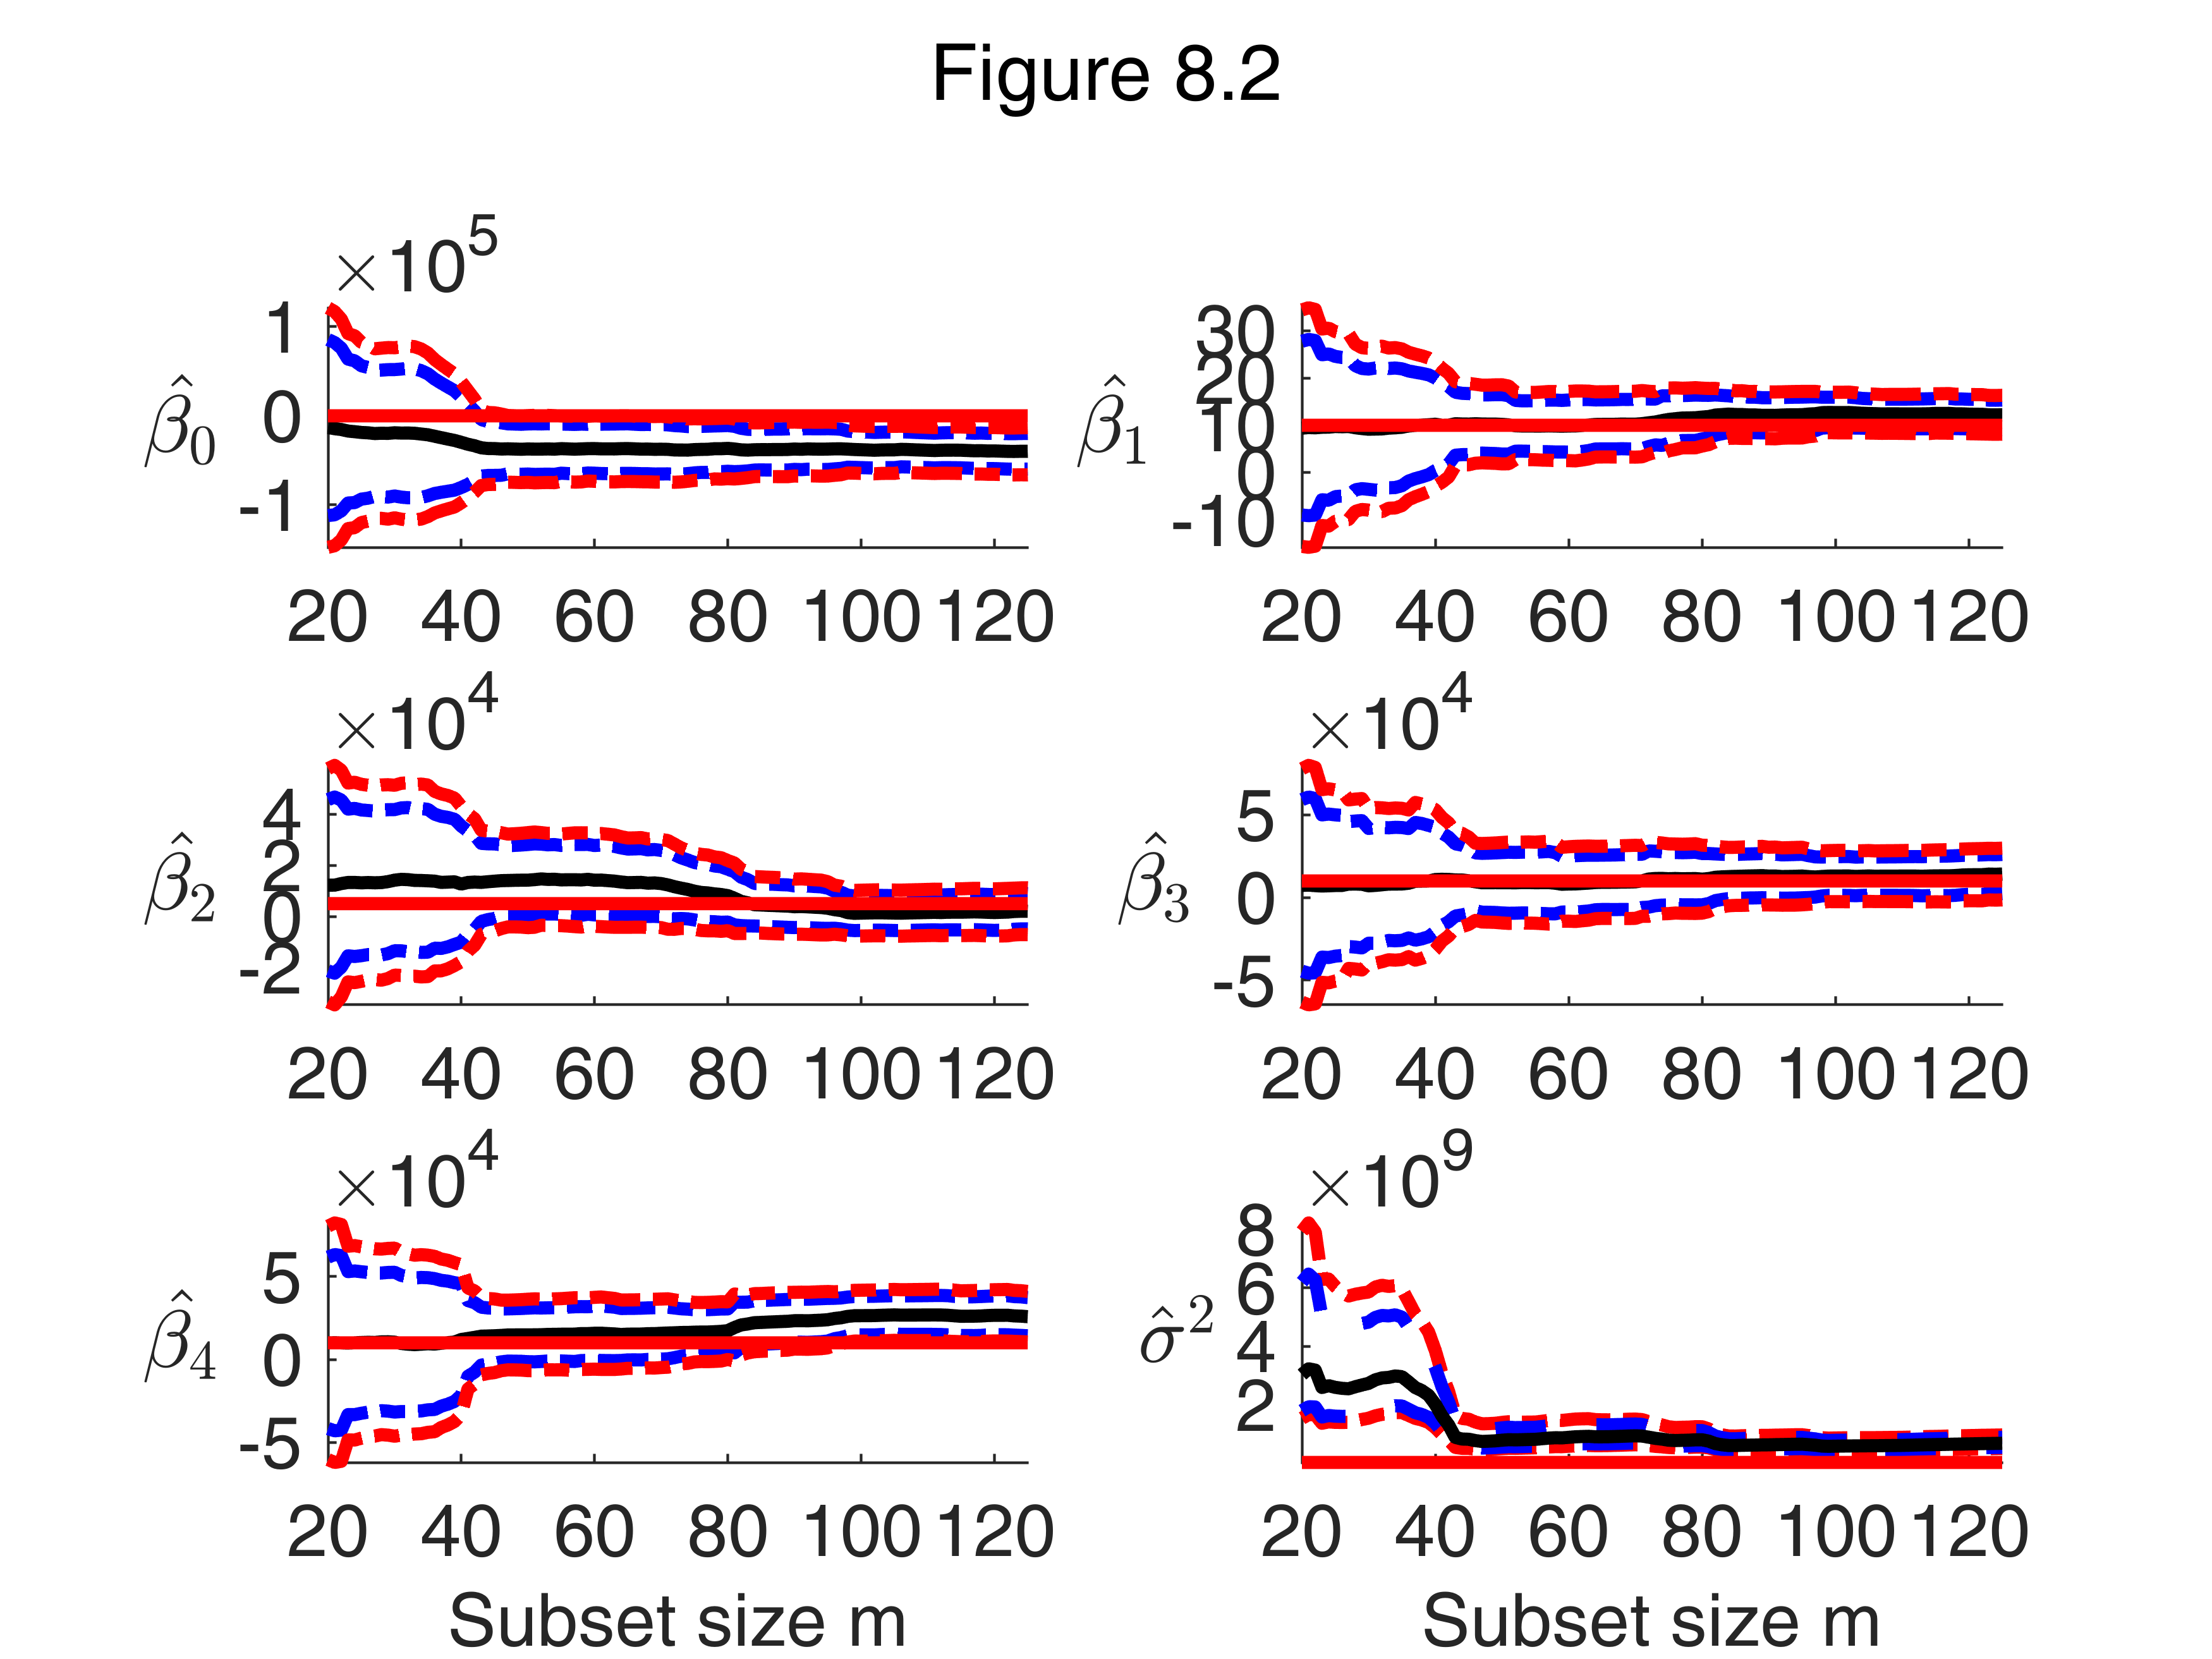

In [7]:

% Set font size, line width and line style
figure;
lwd=2.5;
FontSize=14;
linst={'-','--',':','-.','--',':'};

for j=1:5
    my_subplot=subplot(3,2,j);
    hold('on')
    % plot 95% and 99% HPD  trajectories
    plot(outBAeda.beta1(:,1),outBAeda.beta1HPD(:,1:2,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','b')
    plot(outBAeda.beta1(:,1),outBAeda.beta1HPD(:,3:4,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')

    % plot posterior estimate of beta1_j
    plot(outBAeda.beta1(:,1),outBAeda.beta1(:,j+1)','LineStyle',linst{1},'LineWidth',lwd,'Color','k')

    % Add the horizontal line which corresponds to prior values
    xL = get(my_subplot,'XLim');
    line(xL,[beta0(j) beta0(j)],'Color','r','LineWidth',lwd);

    % Set ylim
    ylimU=max([outBAeda.beta1HPD(:,4,j); beta0(j)]);
    ylimL=min([outBAeda.beta1HPD(:,3,j); beta0(j)]);
    ylim([ylimL ylimU])

    % Add vertical line in correspondence of the step prior to the
    % entry of the first outlier
    line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);

    % Set xlim
    xlim([xlimL xlimU]);

    ylabel([' !!!EQ_1!!! '],'Interpreter','LaTeX','FontSize',20,'rot',-360);
    set(gca,'FontSize',FontSize);
    if j>4
        xlabel('Subset size m','FontSize',FontSize);
    end
end

% Subplot associated with the monitoring of sigma^2
subplot(3,2,6);
%figure()
hold('on')
% 99%
plot(outBAeda.sigma21HPD(:,1),outBAeda.sigma21HPD(:,4:5),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')
% 95%
plot(outBAeda.sigma21HPD(:,1),outBAeda.sigma21HPD(:,2:3),'LineStyle',linst{2},'LineWidth',lwd,'Color','b')
% Plot 1\/tau1
plot(outBAeda.S21(:,1),1./outBAeda.S21(:,3),'LineWidth',lwd,'Color','k')
ylabel(' !!!EQ_2!!! ','Interpreter','LaTeX','FontSize',20,'rot',-360);
set(gca,'FontSize',FontSize);

% Set ylim
ylimU=max([outBAeda.sigma21HPD(:,5); s02]);
ylimL=min([outBAeda.sigma21HPD(:,4); s02]);
ylim([ylimL ylimU])

% Set xlim
xlim([xlimL xlimU]);
xL = get(my_subplot,'XLim');

% Add the horizontal line which corresponds to prior value of  !!!EQ_3!!!
line(xL,[s02 s02],'Color','r','LineWidth',lwd);

% Add vertical line in correspondence of the step prior to the
% entry of the first outlier
line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);
xlabel('Subset size m','FontSize',FontSize);

if prin==1
    % print to postscript
    print -depsc h2.eps;
else
    set(gcf,'Name', 'Figure 8.2');
    sgtitle('Figure 8.2')
end

## Create Figure 8.3

In [8]:
% init = initial point to start monitoring
init=250;
xlimL=init; % lower value of xlim
xlimU=n+1;  % upper value of xlim

outBAeda=FSRBeda(y,X,'bayes',bayes,'init',init, 'conflev', [0.95 0.99]);

m=100
m=200
m=300
m=400
m=500


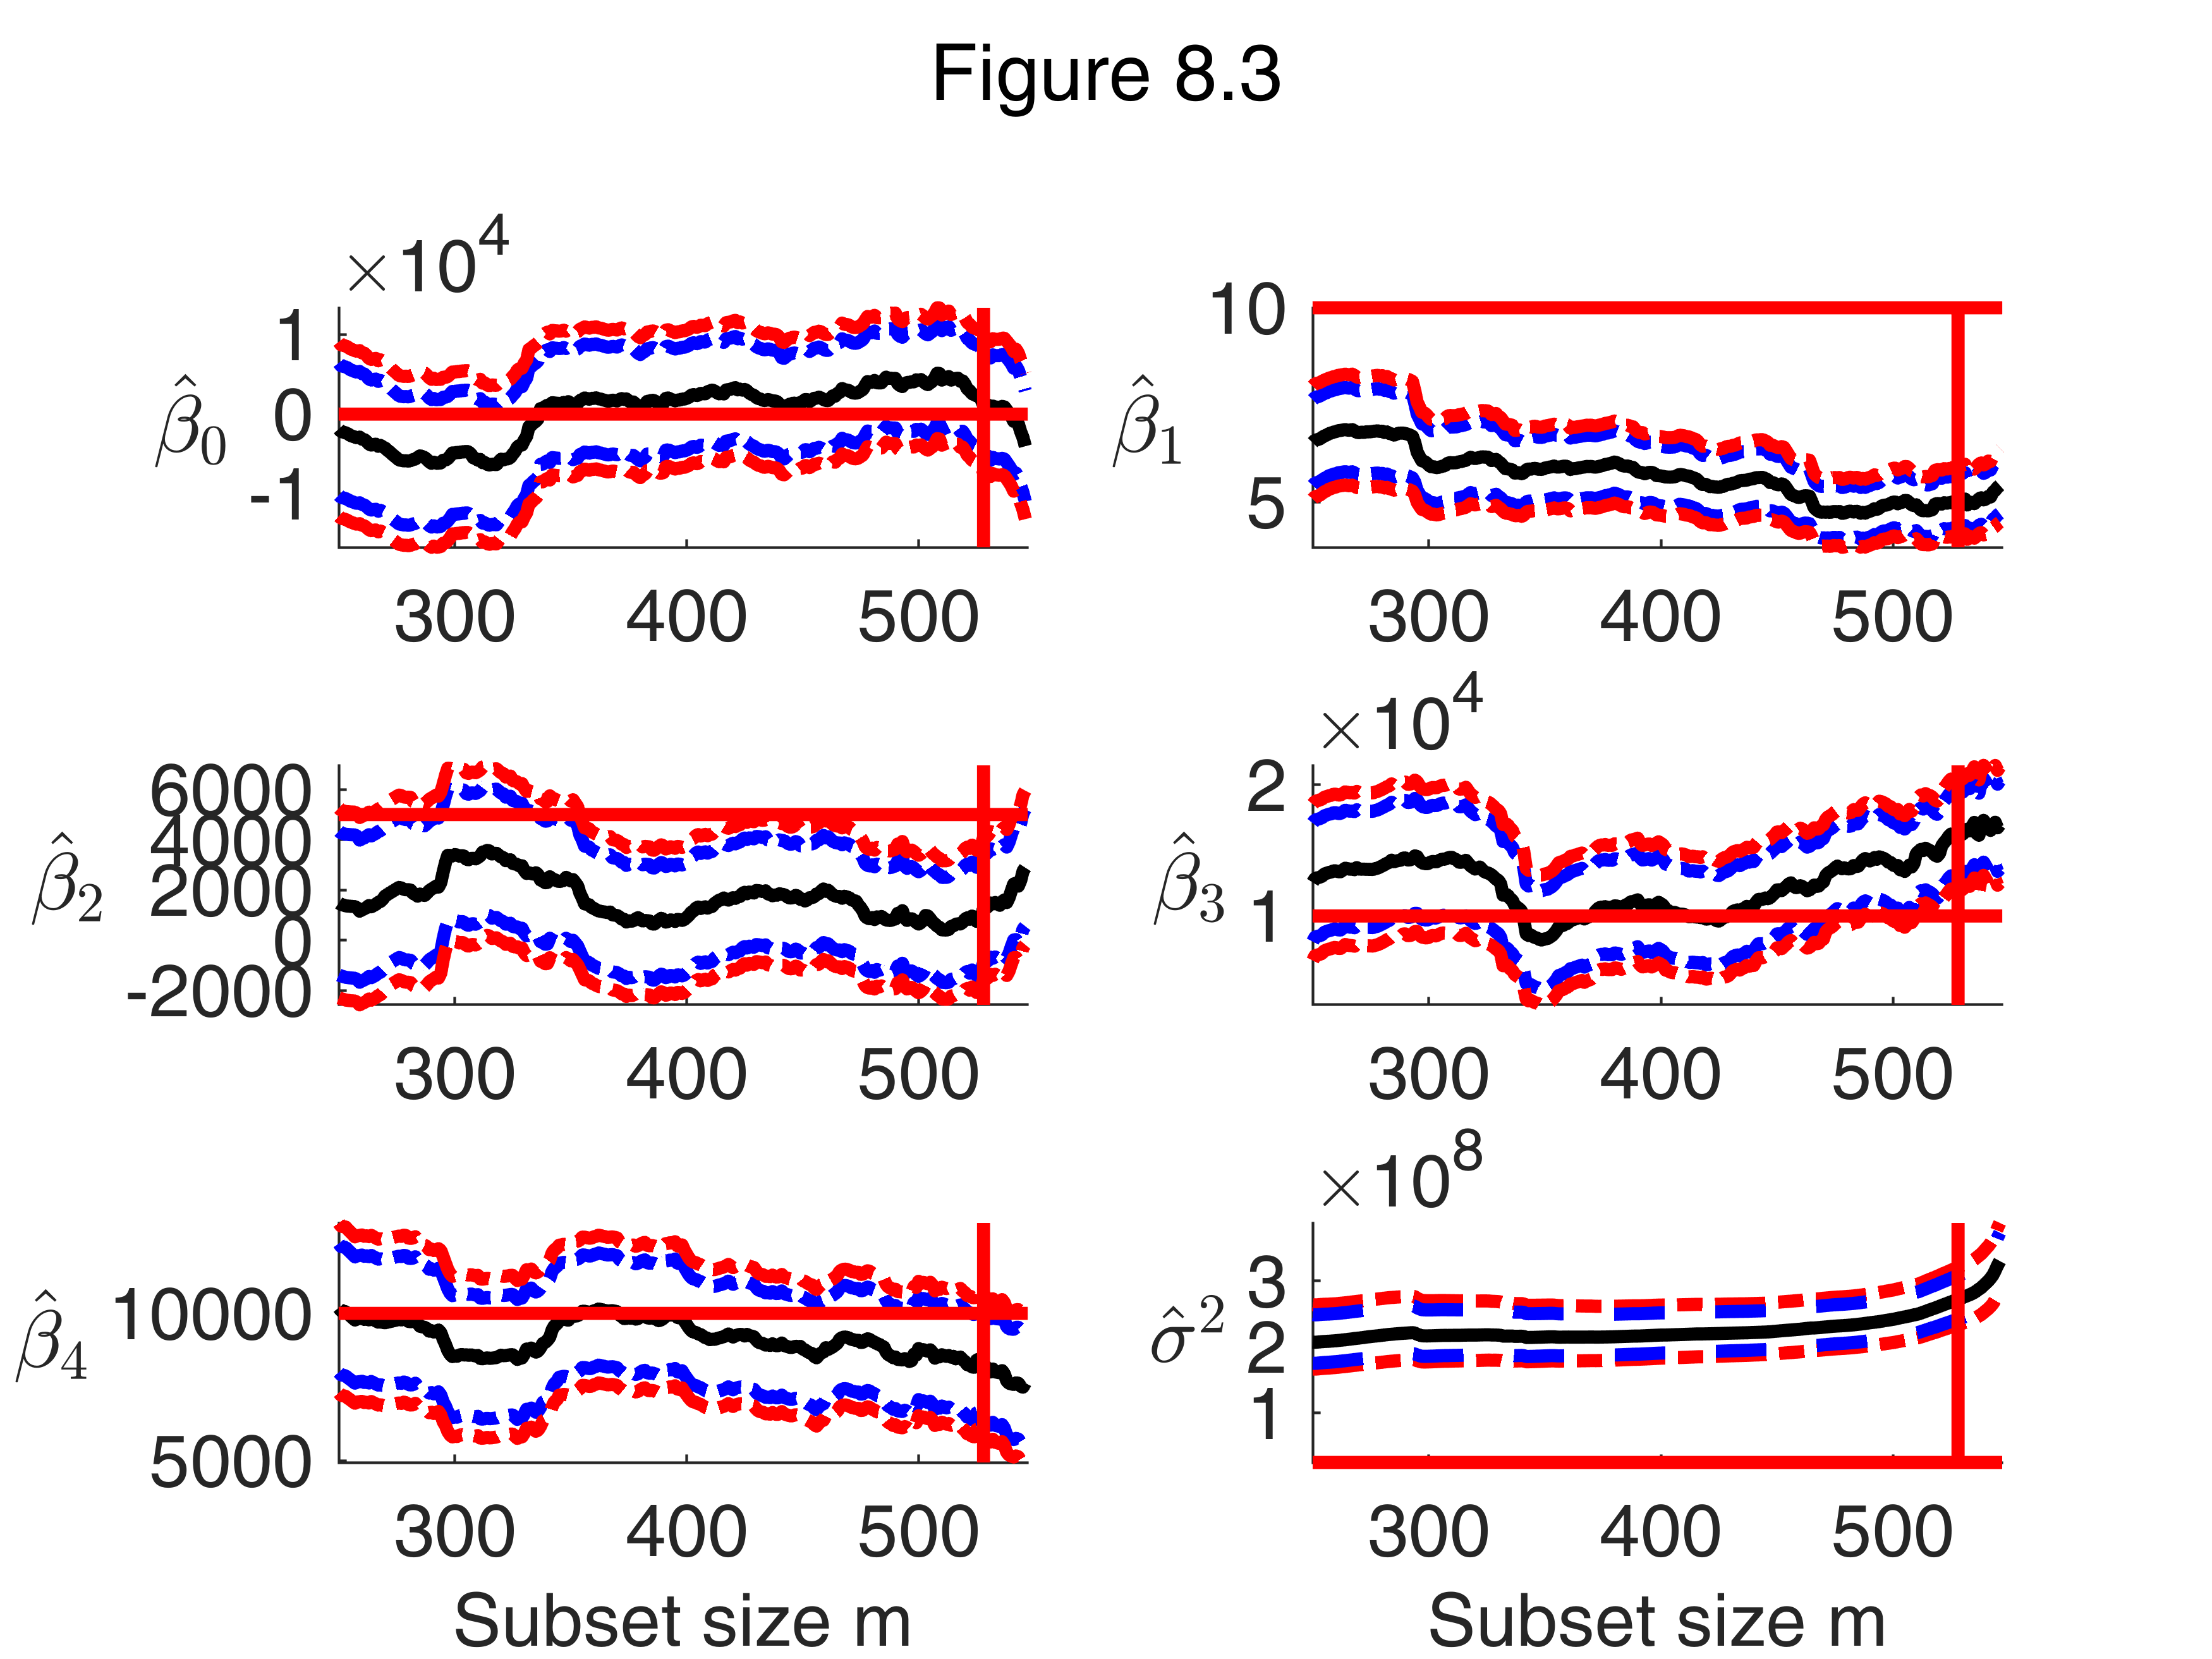

In [9]:
figure;
for j=1:5
    my_subplot=subplot(3,2,j);
    hold('on')
    % plot 95% and 99% HPD  trajectories
    plot(outBAeda.beta1(:,1),outBAeda.beta1HPD(:,1:2,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','b')
    plot(outBAeda.beta1(:,1),outBAeda.beta1HPD(:,3:4,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')

    % plot posterior estimate of beta1_j
    plot(outBAeda.beta1(:,1),outBAeda.beta1(:,j+1)','LineStyle',linst{1},'LineWidth',lwd,'Color','k')

    % Add the horizontal line which corresponds to prior values
    xL = get(my_subplot,'XLim');
    line(xL,[beta0(j) beta0(j)],'Color','r','LineWidth',lwd);

    % Set ylim
    ylimU=max([outBAeda.beta1HPD(:,4,j); beta0(j)]);
    ylimL=min([outBAeda.beta1HPD(:,3,j); beta0(j)]);
    ylim([ylimL ylimU])

    % Set xlim
    xlim([xlimL xlimU]);

    % Add vertical line in correspondence of the step prior to the
    % entry of the first outlier
    line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);

    ylabel([' !!!EQ_4!!! '],'Interpreter','LaTeX','FontSize',20,'rot',-360);
    set(gca,'FontSize',FontSize);
    if j>4
        xlabel('Subset size m','FontSize',FontSize);
    end
end

% Subplot associated with the monitoring of sigma^2
subplot(3,2,6);
%figure()
hold('on')
% 99%
plot(outBAeda.sigma21HPD(:,1),outBAeda.sigma21HPD(:,4:5),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')
% 95%
plot(outBAeda.sigma21HPD(:,1),outBAeda.sigma21HPD(:,2:3),'LineStyle',linst{2},'LineWidth',lwd,'Color','b')
% Plot 1/tau1
plot(outBAeda.S21(:,1),1./outBAeda.S21(:,3),'LineWidth',lwd,'Color','k')
ylabel(' !!!EQ_2!!! ','Interpreter','LaTeX','FontSize',20,'rot',-360);
set(gca,'FontSize',FontSize);

% Set ylim
ylimU=max([outBAeda.sigma21HPD(:,5); s02]);
ylimL=min([outBAeda.sigma21HPD(:,4); s02]);
ylim([ylimL ylimU])

% Set xlim
xlim([xlimL xlimU]);
xL = get(my_subplot,'XLim');

% Add the horizontal line which corresponds to prior value of  !!!EQ_3!!!
line(xL,[s02 s02],'Color','r','LineWidth',lwd);

% Add vertical line in correspondence of the step prior to the
% entry of the first outlier
line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);
xlabel('Subset size m','FontSize',FontSize);
if prin ==1
    print -depsc h3.eps
else
    set(gcf,'Name', 'Figure 8.3');
    sgtitle('Figure 8.3')
end

In [10]:

drawnow

## Figure 8.4 will be created at the end of the file

Note that Figure 8.4 is created later because we need both the output of FSR (frequentist forward search) and FSRB (Bayesian forward search)

## Create Figure 8.5 (frequentist analysis)

Monitoring of 95 per cent and 99 per cent confidence intervals of beta and sigma2 init = point to start monitoring diagnostics along the FS


In [11]:
init=80;
[outLXS]=LXS(y,X,'nsamp',100000);

Total estimated time to complete LMS:  1.77 seconds 
------------------------------

In [12]:
outEDA=FSReda(y,X,outLXS.bs,'conflev',[0.95 0.99],'init',init);

m=100
m=200
m=300
m=400
m=500

In [13]:
p=size(X,2)+1;
% Set font size, line width and line style
figure;
lwd=2.5;
FontSize=14;
linst={'-','--',':','-.','--',':'};
nr=3;
nc=2;
xlimL=250; % lower value fo xlim
xlimU=n+1;  % upper value of xlim
for j=1:p
    subplot(nr,nc,j);
    hold('on')
    % plot 95% and 99% HPD  trajectories
    plot(outEDA.Bols(:,1),outEDA.betaINT(:,1:2,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','b')
    plot(outEDA.Bols(:,1),outEDA.betaINT(:,3:4,j),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')

    % plot estimate of beta1_j
    plot(outEDA.Bols(:,1),outEDA.Bols(:,j+1)','LineStyle',linst{1},'LineWidth',lwd,'Color','k')

    % Set ylim
    ylimU=max(outEDA.betaINT(:,4,j));
    ylimL=min(outEDA.betaINT(:,3,j));
    ylim([ylimL ylimU])

    % Set xlim
    xlim([xlimL xlimU]);

    % Add vertical line in correspondence of the step prior to the
    % entry of the first outlier
    line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);

    ylabel([' !!!EQ_1!!! '],'Interpreter','LaTeX','FontSize',20,'rot',-360);
    set(gca,'FontSize',FontSize);
    if j>(nr-1)*nc
        xlabel('Subset size m','FontSize',FontSize);
    end
end

% Subplot associated with the monitoring of sigma^2
subplot(nr,nc,6);
hold('on')
% 99%
plot(outEDA.sigma2INT(:,1),outEDA.sigma2INT(:,4:5),'LineStyle',linst{4},'LineWidth',lwd,'Color','r')
% 95%
plot(outEDA.sigma2INT(:,1),outEDA.sigma2INT(:,2:3),'LineStyle',linst{2},'LineWidth',lwd,'Color','b')
% Plot rescaled S2
plot(outEDA.S2(:,1),outEDA.S2(:,4),'LineWidth',lwd,'Color','k')
ylabel(' !!!EQ_2!!! ','Interpreter','LaTeX','FontSize',20,'rot',-360);
set(gca,'FontSize',FontSize);

% Set ylim
ylimU=max(outEDA.sigma2INT(:,5));
ylimL=min(outEDA.sigma2INT(:,4));
ylim([ylimL ylimU])
% Set xlim
xlim([xlimL xlimU]);

% Add vertical line in correspondence of the step prior to the
% entry of the first outlier
line([dout; dout],[ylimL; ylimU],'Color','r','LineWidth',lwd);
xlabel('Subset size m','FontSize',FontSize);

% Add multiple title
disp(['The vertical lines are located in the' ...
    ' step prior to the inclusion of the first outlier'])

The vertical lines are located in the step prior to the inclusion of the first outlier


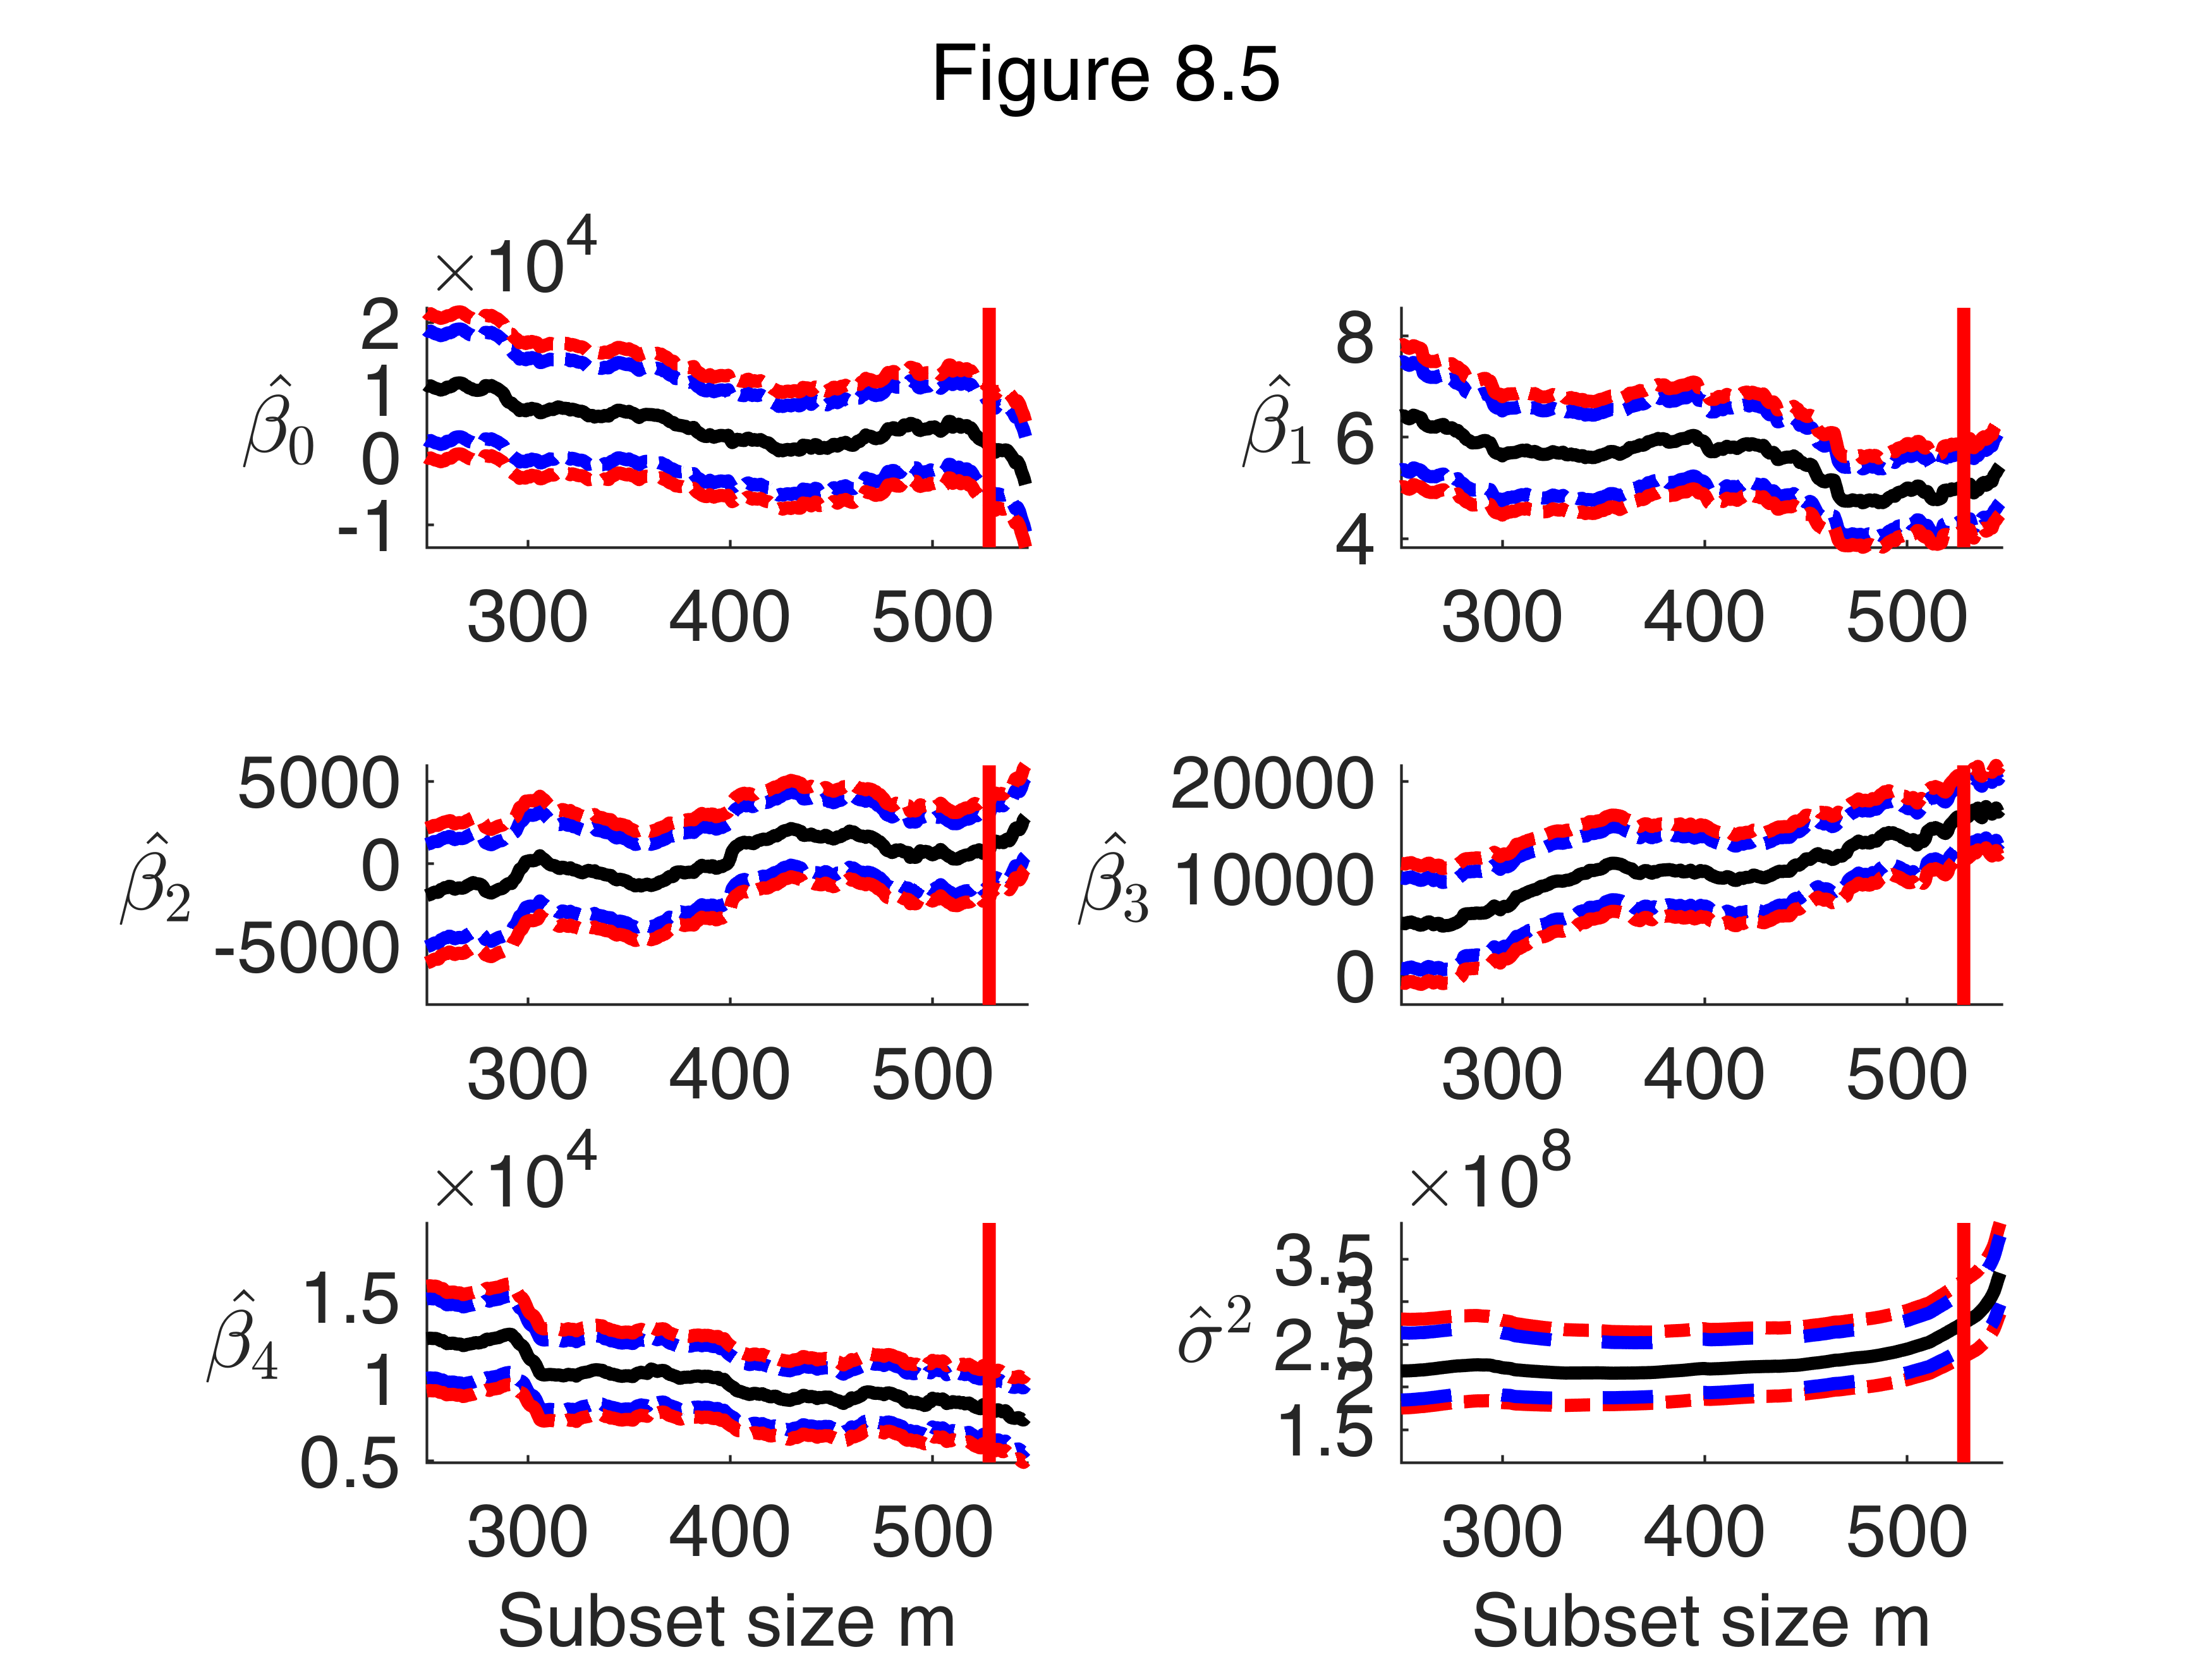

In [14]:
if prin ==1
    print -depsc h5.eps
else
    set(gcf,'Name', 'Figure 8.5');
    sgtitle('Figure 8.5')
end

In [15]:

drawnow

## Create Figure 8.6


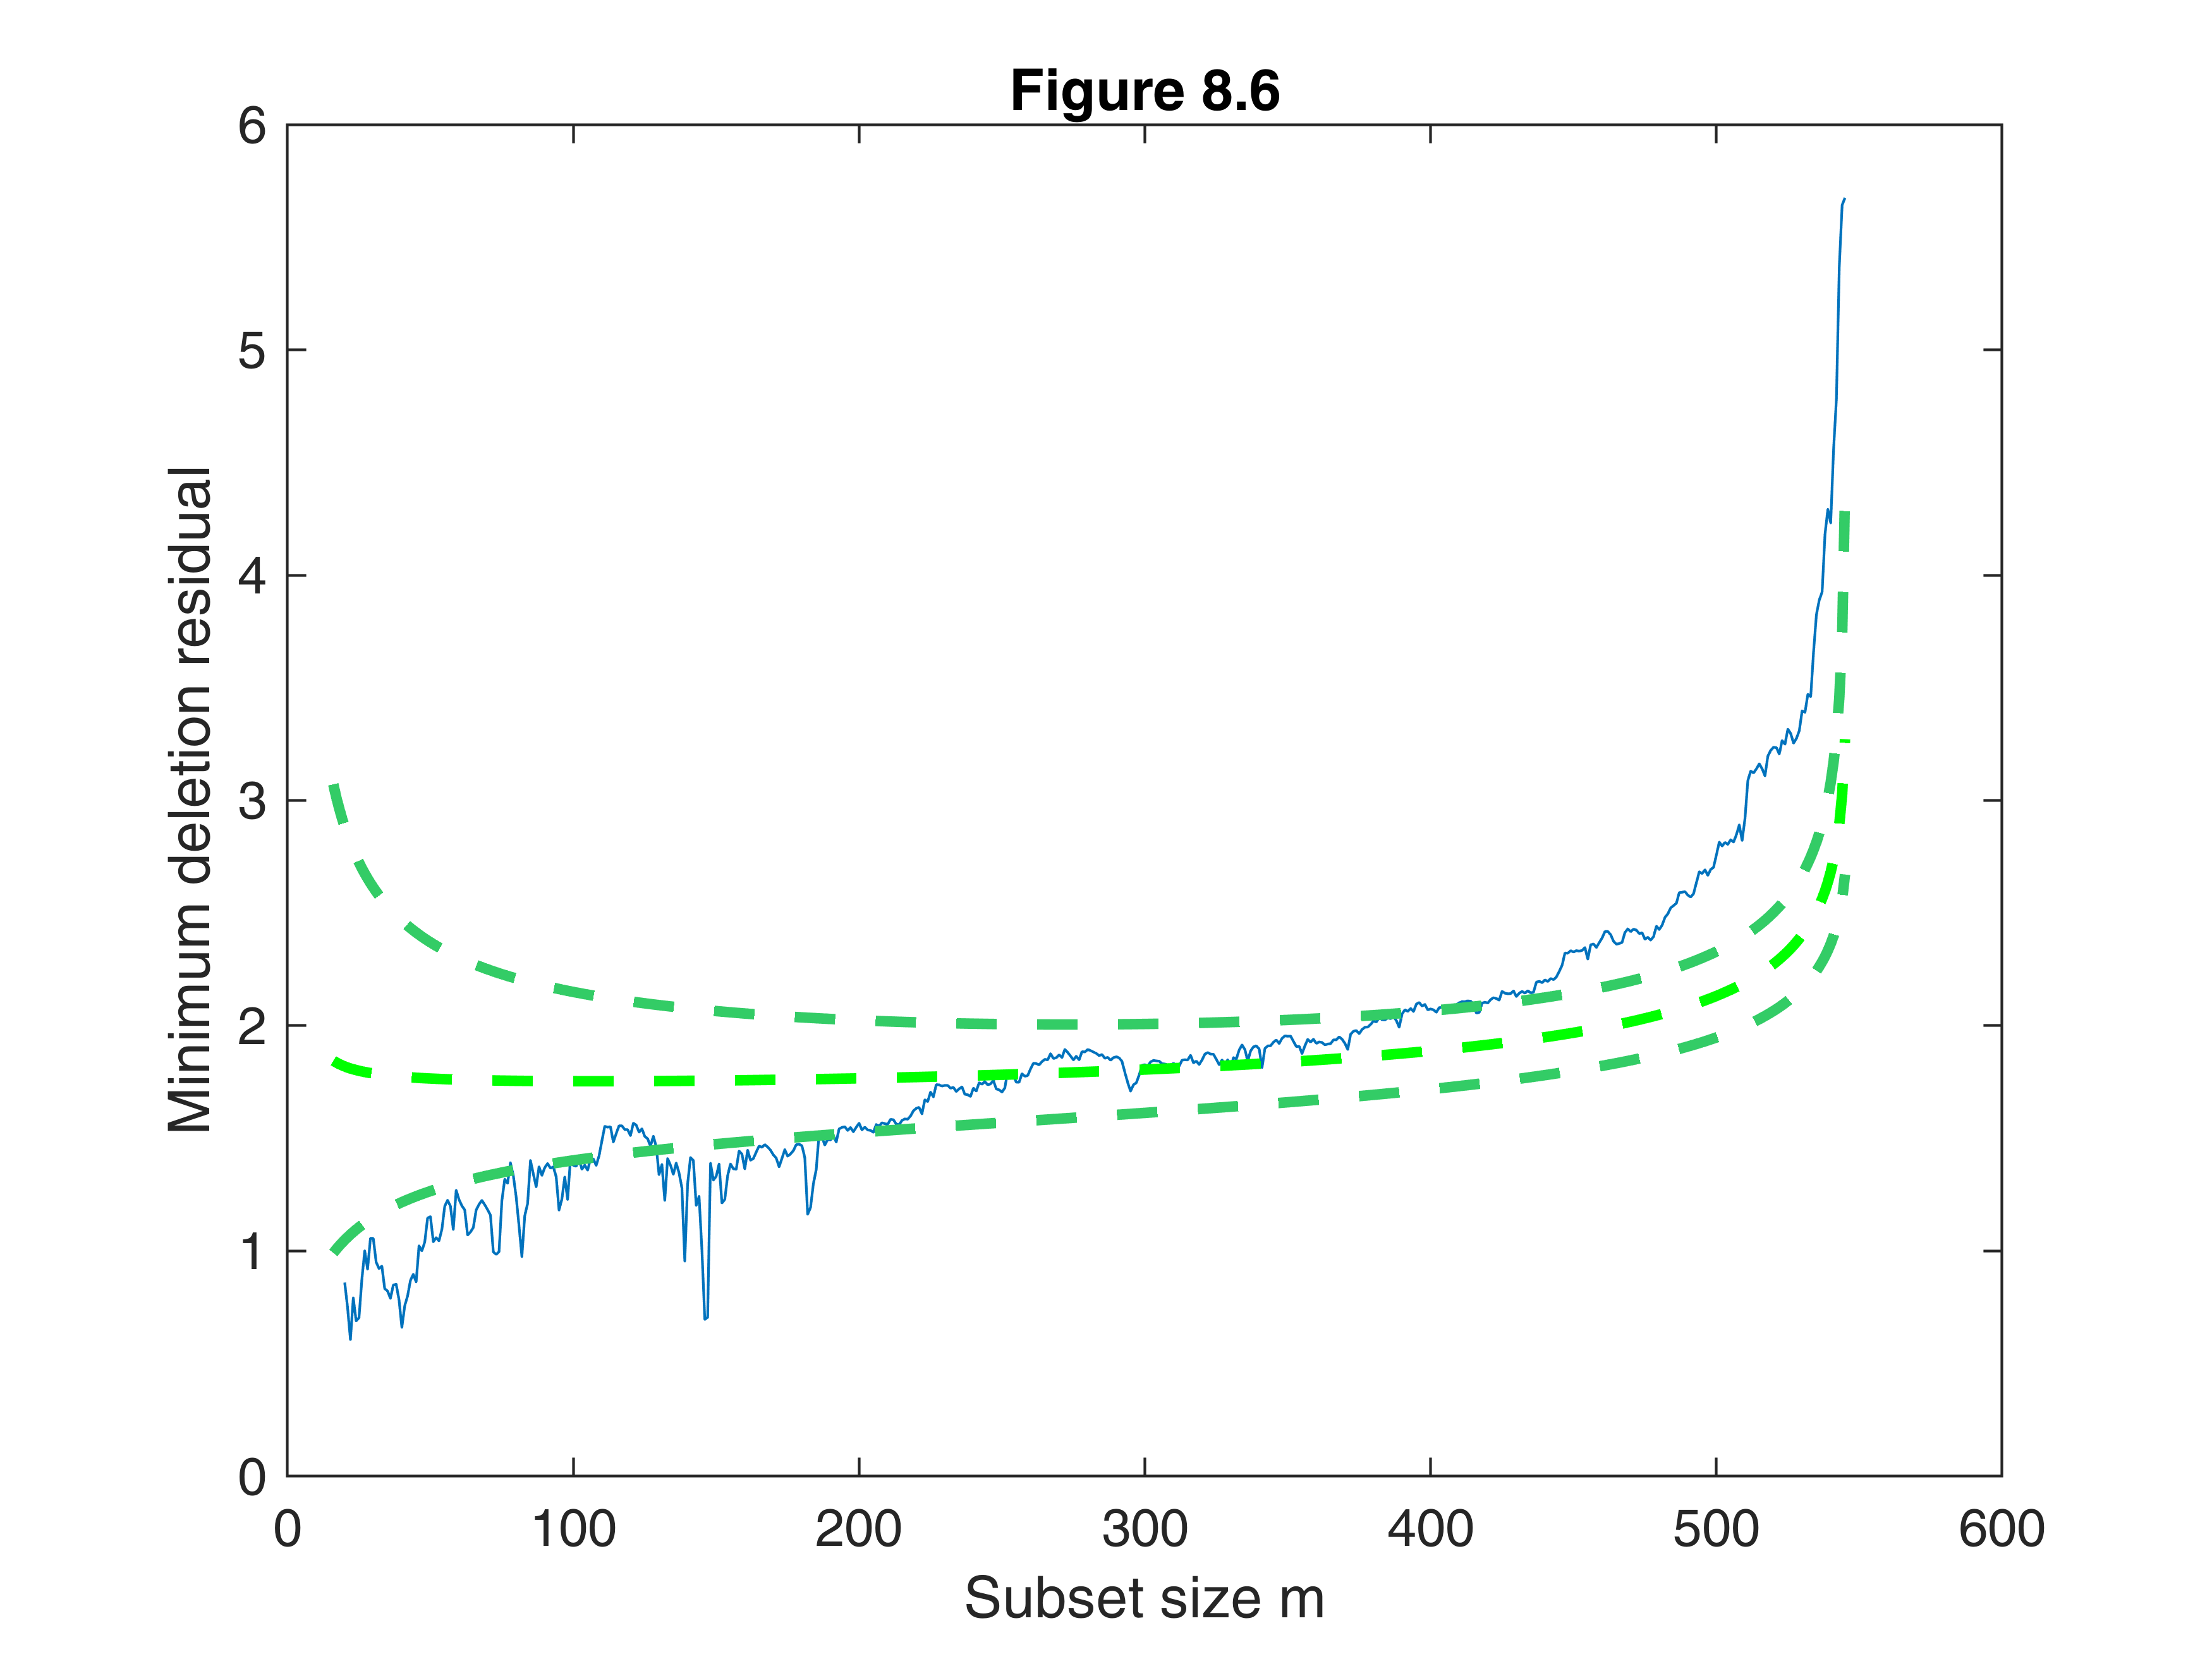

In [16]:
figure
n0=250;

FSRBmdr(y,X,beta0, R, tau0, n0,'init',20,'plots',1);
ylabel('Minimum deletion residual')
if prin ==1
    print -depsc h6.eps
else
    set(gcf,'Name', 'Figure 8.6');
    title('Figure 8.6')
end

In [17]:
drawnow

## Create Figure 8.7 (frequentist analysis)


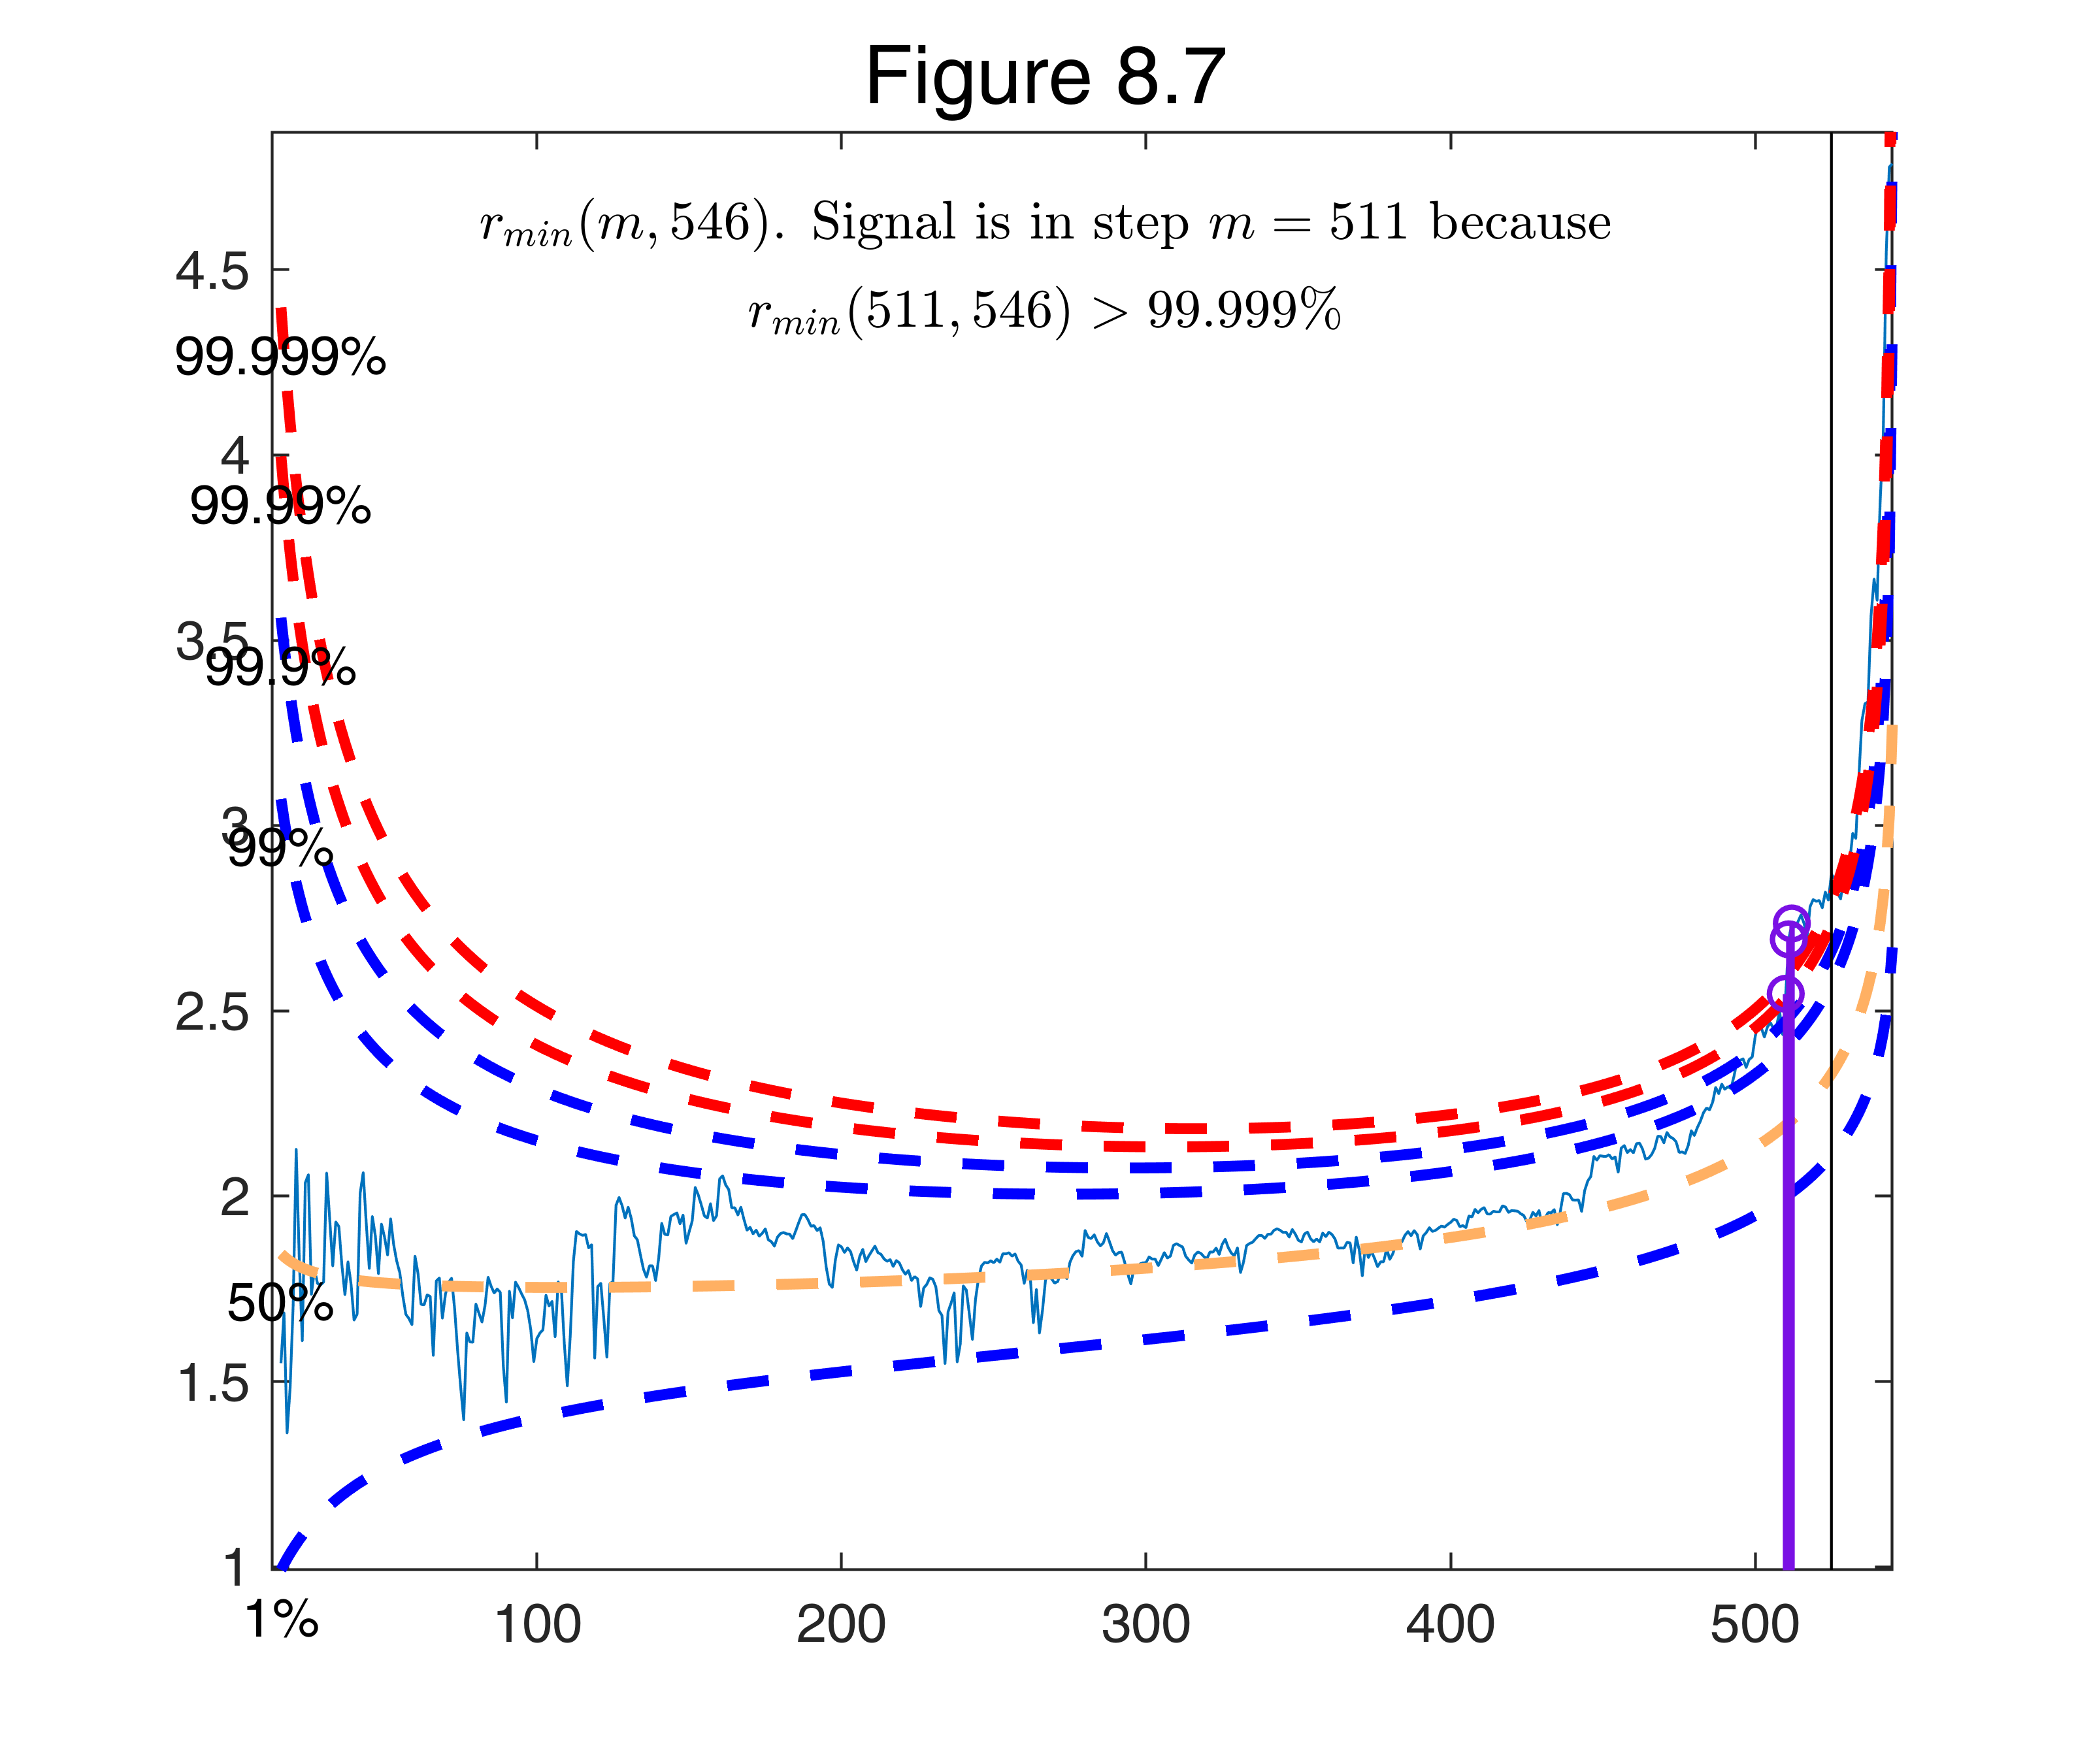

In [18]:
outFSR=FSR(y,X,'plots',1,'msg',0, 'tag','pl_fsrfreq');
dout=n-length(outFSR.ListOut);

fig=findobj(0,'tag','fsr_yXplot');
close(fig)

fig=findobj(0,'tag','pl_fsrfreq');
figure(fig(1))
if prin ==1
    print -depsc  h7.eps
else
    set(gcf,'Name', 'Figure 8.7');
    sgtitle('Figure 8.7')
end

## Create Figure 8.4

Note that plot is created later because we need both the output of FSR (frequentist forward search) and FSRB (Bayesian forward search)


In [19]:
group=ones(n,1);
commonOutliers=intersect(outFSR.outliers,outFSRB.outliers);
onlyFSRB=setdiff(outFSRB.outliers,outFSR.outliers);
group(commonOutliers)=2;
group(onlyFSRB)=3;
yXplot(y,X,'group',group)

ans = 
ans(:,:,1) =
   10.0006   11.0005   12.0005   13.0005
ans(:,:,2) =
   14.0005   15.0005   16.0005   17.0005
ans(:,:,3) =
     0     0     0     0


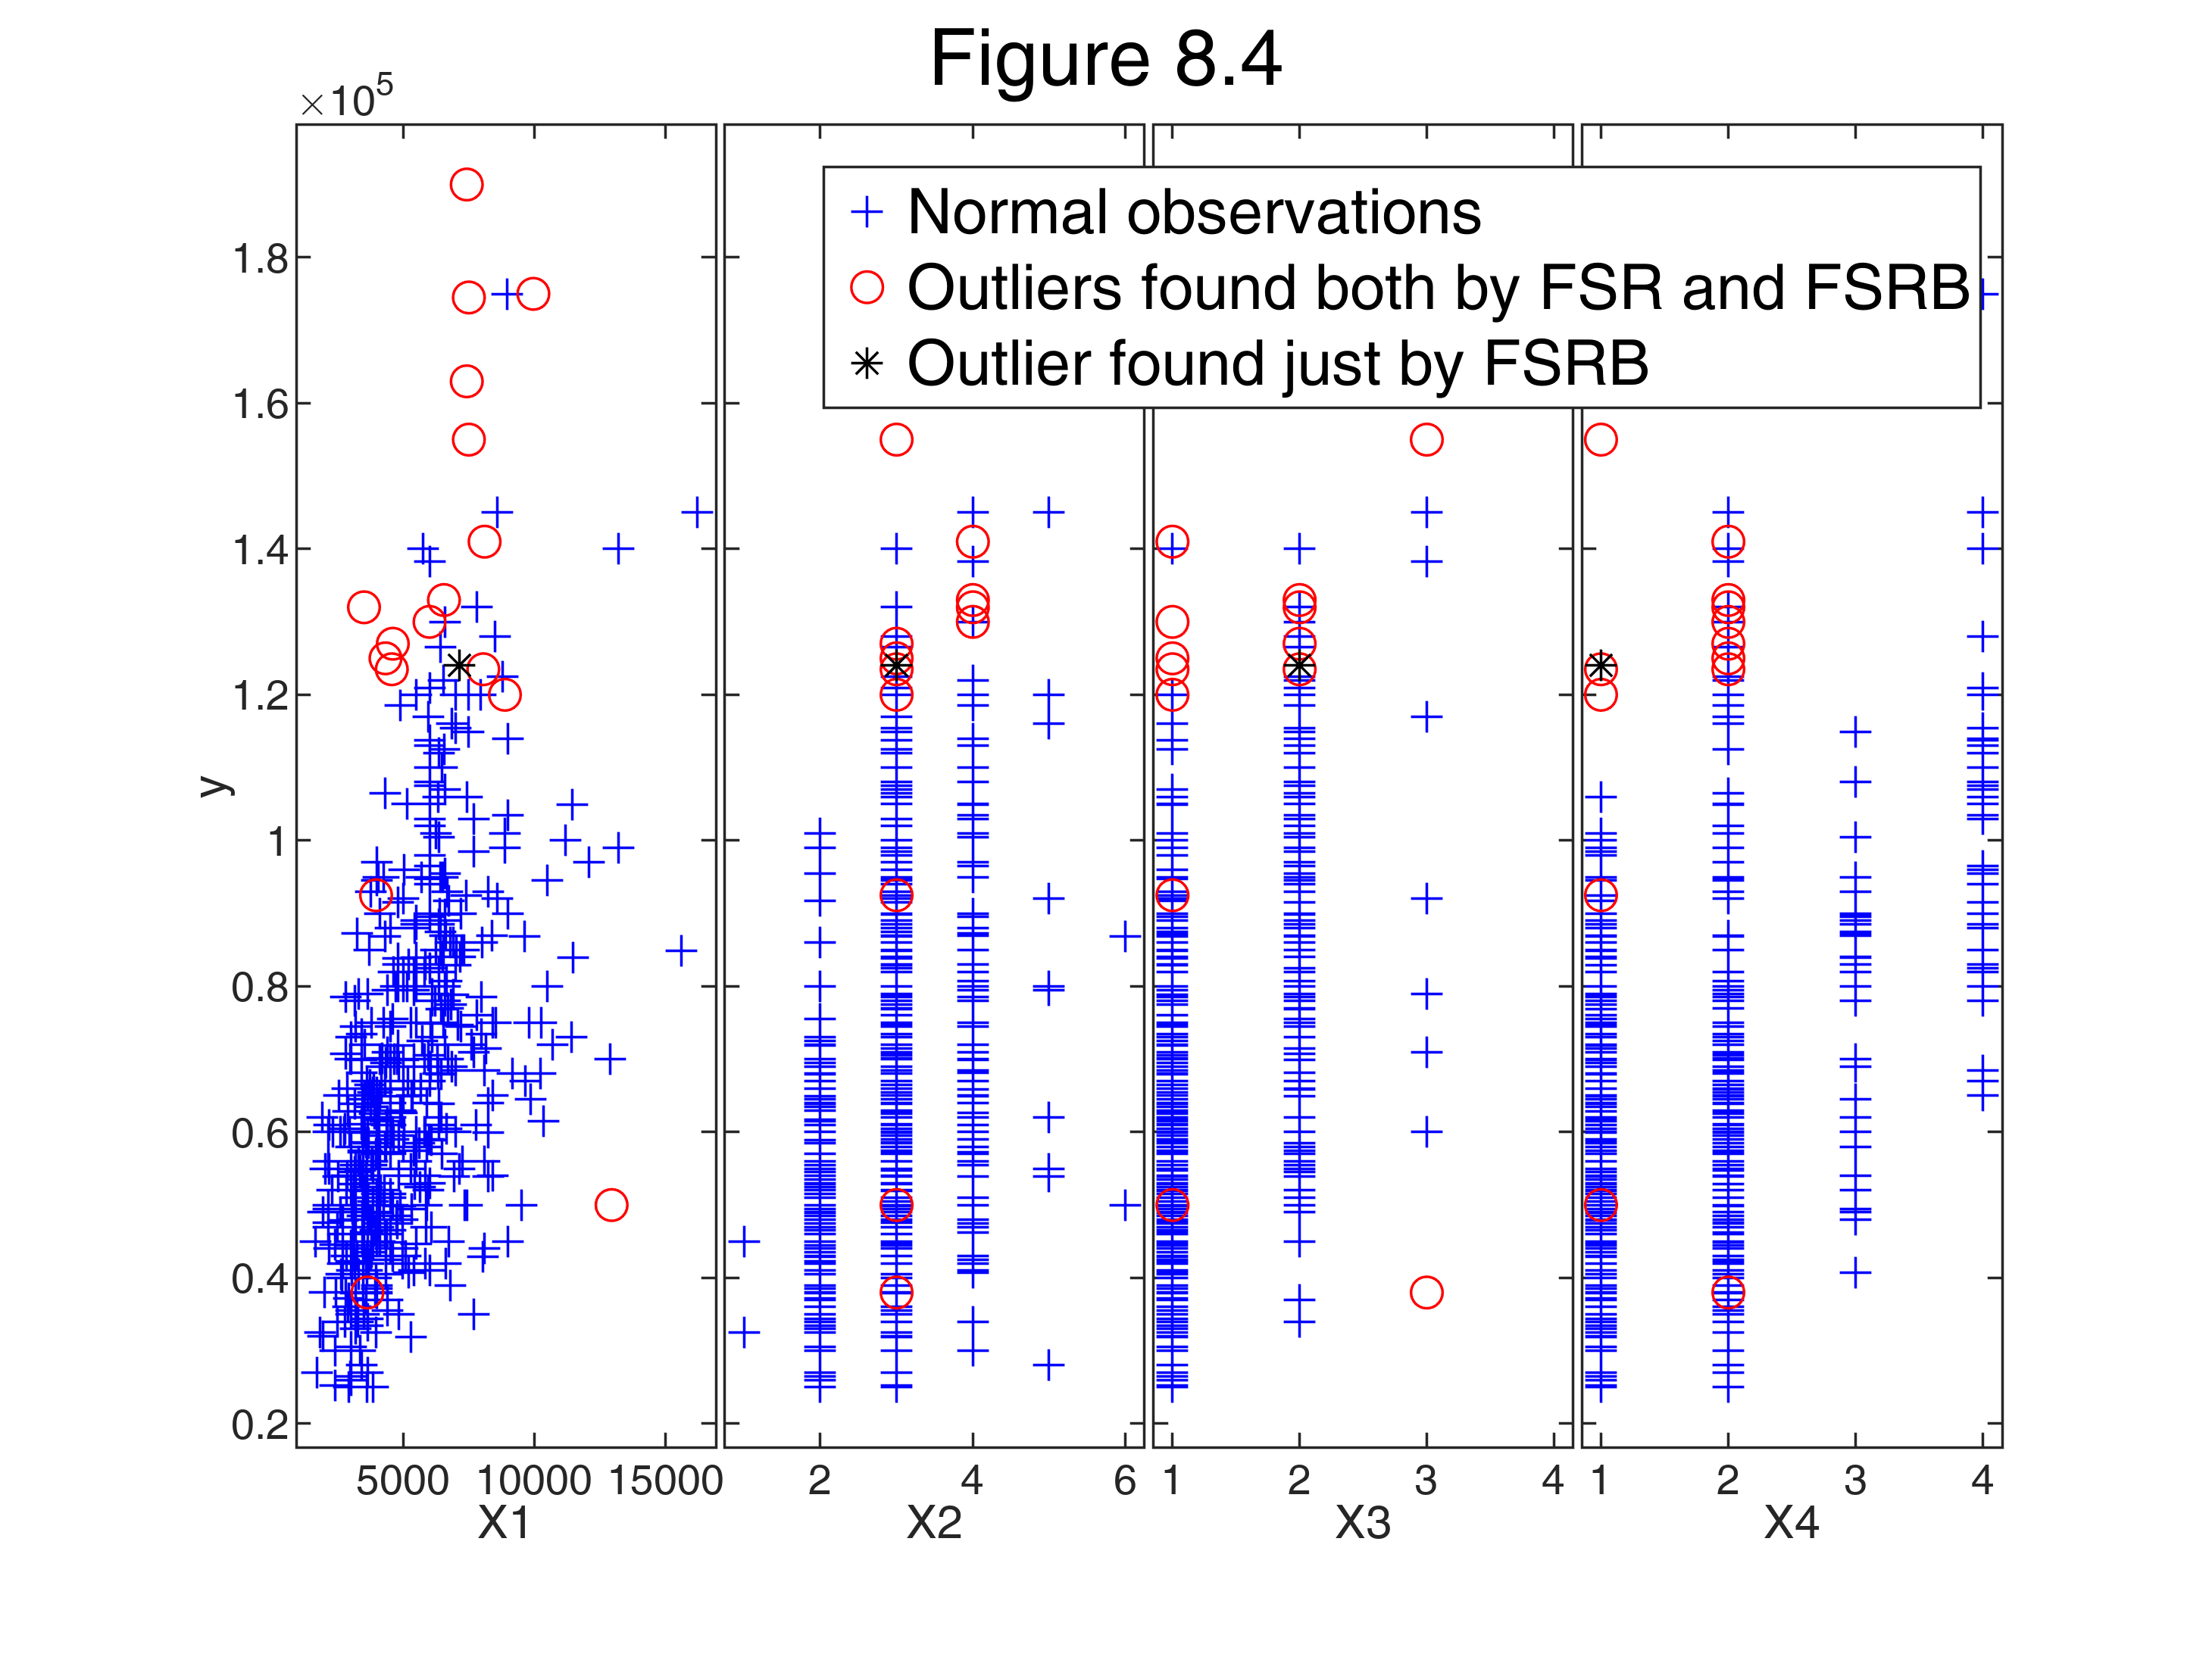

In [20]:
legend(["Normal observations" "Outliers found both by FSR and FSRB" "Outlier found just by FSRB"])

if prin ==1
    print -depsc h4.eps;
else
    set(gcf,'Name', 'Figure 8.4');
    sgtitle('Figure 8.4')
end

In [21]:
%InsideREADME